# Cloning our data



In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs


Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
  !ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
import pickle 
import pandas as pd, numpy as np , matplotlib.pyplot as plt
import tensorflow as tf
import cv2, random

## Unzipping our dataset

In [5]:
with open("/content/german-traffic-signs/train.p", mode = 'rb') as training_data:
  train = pickle.load(training_data)

with open("/content/german-traffic-signs/test.p", mode = 'rb') as testt:
  test = pickle.load(testt)

with open("/content/german-traffic-signs/valid.p", mode = 'rb') as validd:
  valid = pickle.load(validd)


In [6]:
train.items()

dict_items([('coords', array([[  6,   5,  21,  20],
       [  6,   6,  22,  22],
       [  5,   6,  22,  23],
       ...,
       [ 17,  15, 178, 155],
       [ 17,  15, 183, 160],
       [ 20,  18, 211, 184]], dtype=uint8)), ('labels', array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)), ('features', array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]]

## Splitting our dataset

In [7]:
X_train , Y_train = train['features'] , train['labels']
x_valid , y_valid = valid['features'] , valid['labels']
x_test , y_test = test['features'] , test['labels']

## Visualizig the dataset

In [8]:
print('Shape of our training data -> ', X_train.shape)
print('Shape of our validation data -> ', x_valid.shape)
print('Shape of our testing data -> ', x_test.shape)

Shape of our training data ->  (34799, 32, 32, 3)
Shape of our validation data ->  (4410, 32, 32, 3)
Shape of our testing data ->  (12630, 32, 32, 3)


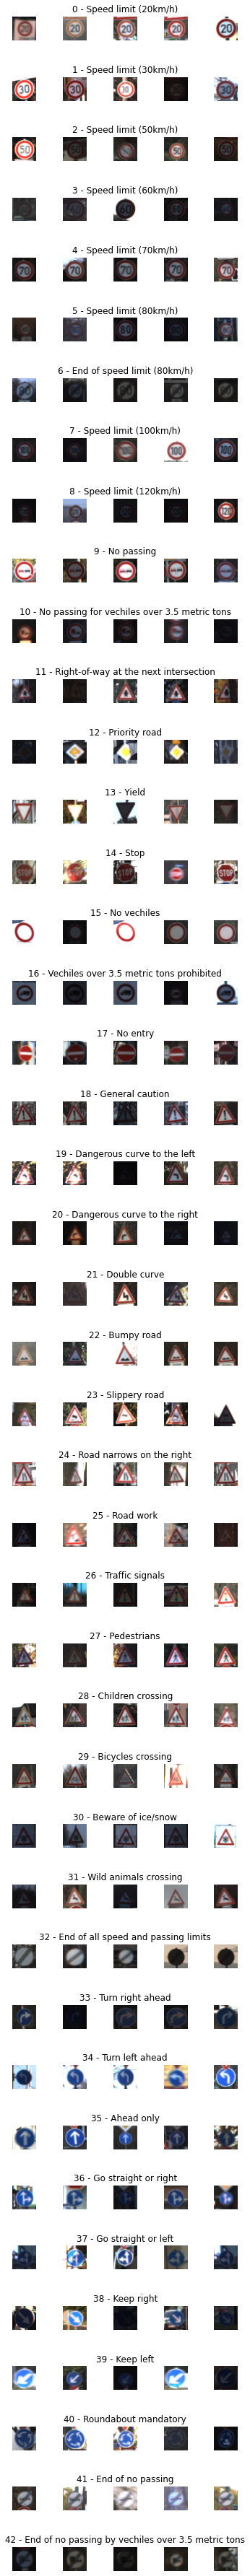

In [10]:
data = pd.read_csv('/content/german-traffic-signs/signnames.csv')
fig, axs = plt.subplots(nrows=43, ncols=5, figsize=(5,50))
fig.tight_layout()
distribution = []
for i in range(43):
  n , sign = data.loc[i,:]
  for j  in range(5):
    currentdf = X_train[ Y_train == n ]
    img = random.choice(currentdf)
    axs[i][j].imshow(img , cmap=plt.get_cmap('gray'))
    axs[i][j].axis('off')
    if j == 2 :
      axs[i][j].set_title(str(i) + ' - ' + sign )
  distribution.append(len(X_train[Y_train==n]))

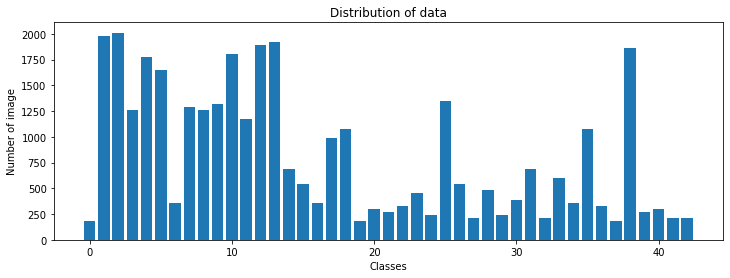

In [11]:
plt.figure(figsize=(12,4))
plt.bar(range(0,43),distribution)
plt.xlabel('Classes')
plt.ylabel('Number of image')
plt.title('Distribution of data')
plt.show()

## Image preprocessing
#1 - Changing to Grayscale for fast computation
#2 - Equalizing the contrast of every image
#3 - Normalizing our image for fast computation

In [48]:
def rgb2G( img ):
  img= cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
  return img
def equalize( img ):
  img = cv2.equalizeHist(img)
  return img

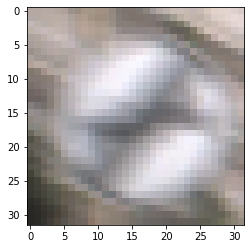

In [49]:
plt.imshow( train['features'][55] )
plt.show()

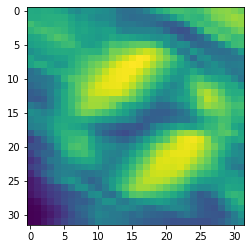

In [50]:
img = plt.imshow( rgb2G(train['features'][55])  )
plt.show()

In [52]:
def preprocessing( img ):
  img = equalize( rgb2G( img ) )
  img = img/255.
  return img

In [53]:
X_train = list(map(preprocessing , X_train))
x_valid = list(map(preprocessing , x_valid))
x_test = list(map(preprocessing , x_test))

In [59]:
X_train = np.array(X_train).reshape(34799,32,32,1)
x_valid = np.array(x_valid).reshape(4410,32,32,1)
X_test = np.array(x_test).reshape(12630,32,32,1)

In [60]:
Y_train = tf.keras.utils.to_categorical(Y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)
y_valid = tf.keras.utils.to_categorical(y_valid, 43)

## Designing our model

In [61]:
model = tf.keras.models.Sequential([
                                    
                tf.keras.layers.Conv2D(60,(5,5),input_shape=(32,32,1) , activation = 'relu'),
                tf.keras.layers.Conv2D(60,(5,5),activation = 'relu'),
                tf.keras.layers.MaxPooling2D((2,2)),

                tf.keras.layers.Conv2D(30,(3,3), activation = 'relu'),
                tf.keras.layers.Conv2D(30,(3,3),activation = 'relu'),
                tf.keras.layers.MaxPooling2D((2,2)),

                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(500, activation = 'relu'),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(43,activation = 'softmax')

])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [63]:
model.compile(metrics = ['accuracy'] , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , loss = 'categorical_crossentropy')

## Creating a DataGenerator for generating different data per epoch

(15, 32, 32, 1)


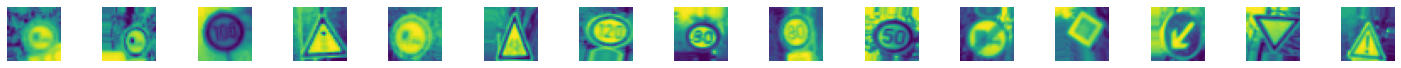

In [67]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
batches = datagen.flow(X_train, Y_train, batch_size = 15)
X_batch, Y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)


In [70]:
history = model.fit_generator( datagen.flow(X_train,Y_train,batch_size = 50 )
    ,steps_per_epoch=34799/50,
    validation_data = (x_valid , y_valid),
    epochs = 15,
    verbose = 1,
    )

Epoch 1/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1189 - accuracy: 0.9636 - val_loss: 0.0423 - val_accuracy: 0.9880
Epoch 2/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1120 - accuracy: 0.9639 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 3/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1094 - accuracy: 0.9657 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 4/15
696/695 [==============================] - 12s 18ms/step - loss: 0.1064 - accuracy: 0.9668 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 5/15
696/695 [==============================] - 12s 18ms/step - loss: 0.0983 - accuracy: 0.9696 - val_loss: 0.0491 - val_accuracy: 0.9853
Epoch 6/15
696/695 [==============================] - 12s 18ms/step - loss: 0.0930 - accuracy: 0.9710 - val_loss: 0.0273 - val_accuracy: 0.9923
Epoch 7/15
696/695 [==============================] - 12s 18ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.0253 - val_accuracy:

Text(0.5, 0, 'epoch')

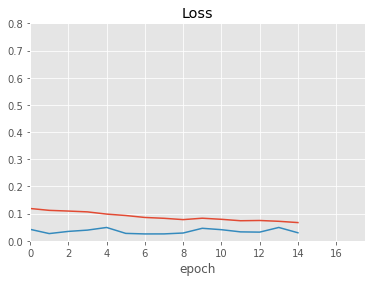

In [81]:
axes = plt.gca()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
axes.set_xlim([0.0,17.5])
axes.set_ylim([0.0,0.8])
plt.title('Loss')
plt.xlabel('epoch')

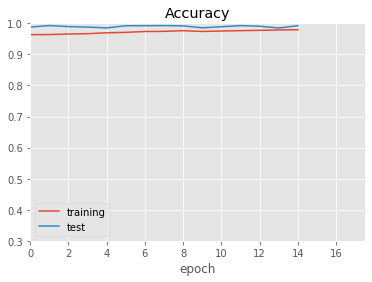

In [83]:
axes = plt.gca()
axes.set_xlim([0.0,17.5])
axes.set_ylim([0.30,1.00])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.style.use('ggplot')

## Testing our model

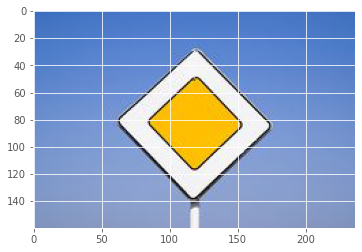

In [92]:
import requests
from PIL import Image
url = 'https://thumbs.dreamstime.com/t/road-signs-main-road-sign-blue-background-road-signs-main-road-sign-blue-background-109436823.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [93]:
img = np.array(img)
img = cv2.resize(img , (32,32))
img = preprocessing( img )
img = np.array(img).reshape(1,32,32,1)

In [99]:
print('The photo belong to ', data.loc[model.predict_classes(img)[0],:][1] , ' class')

The photo belong to  Priority road  class


## Testing on test set

In [104]:
prediction = model.predict_classes(X_test)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction , test['labels'])


0.9697545526524148

In [102]:
model.save('weights.h5')